# Análisis de criterios de redacción

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

## Carga de datos y preparación

In [ ]:
# Cargar el archivo
file_path = "/content/datos calificacion redaccion - Sheet2.csv"
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   nombre                             180 non-null    object 
 1   periodico                          180 non-null    object 
 2   ventas                             180 non-null    object 
 3   cantidad                           180 non-null    object 
 4   fecha                              180 non-null    object 
 5   Texto_Relevancia                   177 non-null    float64
 6   Texto_Impacto                      180 non-null    int64  
 7   Texto_Rigor_Etica_Profesional      180 non-null    int64  
 8   Texto_Coyuntura                    180 non-null    int64  
 9   Texto_Penetracion                  180 non-null    int64  
 10  Fotografia_Impacto                 180 non-null    int64  
 11  Fotografia_Variedad_Fotos          180 non-null    int64  

In [ ]:
# Convertir las columnas de ventas y cantidad a valores numéricos
df["ventas"] = df["ventas"].replace('[^\d.]', '', regex=True).astype(float)
df["cantidad"] = df["cantidad"].replace('[^\d.]', '', regex=True).astype(float)

In [ ]:
# Convertir la columna de fecha a tipo datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')
df["año"] = df["fecha"].dt.year

<ipython-input-64-04f8fbf5e022>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')


In [ ]:
# Seleccionar las columnas de criterios de evaluación
criterios = df.columns[5:]  # Excluir columnas que no son de evaluación

In [ ]:
# Imputación de valores faltantes con KNN
imputer = KNNImputer(n_neighbors=5)
df[criterios] = imputer.fit_transform(df[criterios])

In [ ]:
# Normalización de los criterios
scaler = MinMaxScaler()
df[criterios] = scaler.fit_transform(df[criterios])

## Analisis de criterios


In [ ]:
# Calcular la puntuación media por periódico
df["puntuacion_media"] = df[criterios].mean(axis=1)
promedio_por_periodico = df.groupby("periodico")["puntuacion_media"].mean().sort_values(ascending=False)

<ipython-input-95-5da3f7360d35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_por_periodico.index, y=promedio_por_periodico.values, palette="Blues_r", order=promedio_por_periodico.index) #Blues_r


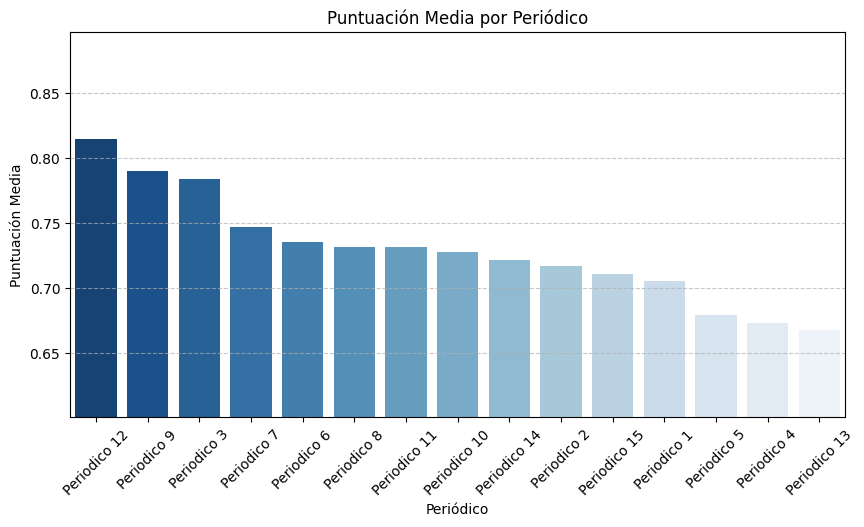

In [ ]:
# Gráfico de barras: Puntuación media por periódico con Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=promedio_por_periodico.index, y=promedio_por_periodico.values, palette="Blues_r", order=promedio_por_periodico.index) #Blues_r
plt.xlabel("Periódico")
plt.ylabel("Puntuación Media")
plt.title("Puntuación Media por Periódico")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(promedio_por_periodico.min() * 0.9, promedio_por_periodico.max() * 1.1)
plt.show()

In [ ]:
# Estadísticas descriptivas
estadisticas = df[criterios].describe()
print("Estadísticas descriptivas:")
print(estadisticas)

Estadísticas descriptivas:
       Texto_Relevancia  Texto_Impacto  Texto_Rigor_Etica_Profesional  \
count        180.000000     180.000000                     180.000000   
mean           0.791389       0.793056                       0.766667   
std            0.268184       0.264034                       0.303149   
min            0.000000       0.000000                       0.000000   
25%            0.575000       0.750000                       0.500000   
50%            1.000000       1.000000                       1.000000   
75%            1.000000       1.000000                       1.000000   
max            1.000000       1.000000                       1.000000   

       Texto_Coyuntura  Texto_Penetracion  Fotografia_Impacto  \
count       180.000000         180.000000          180.000000   
mean          0.783333           0.751389            0.763889   
std           0.288756           0.287662            0.269131   
min           0.000000           0.000000            0.

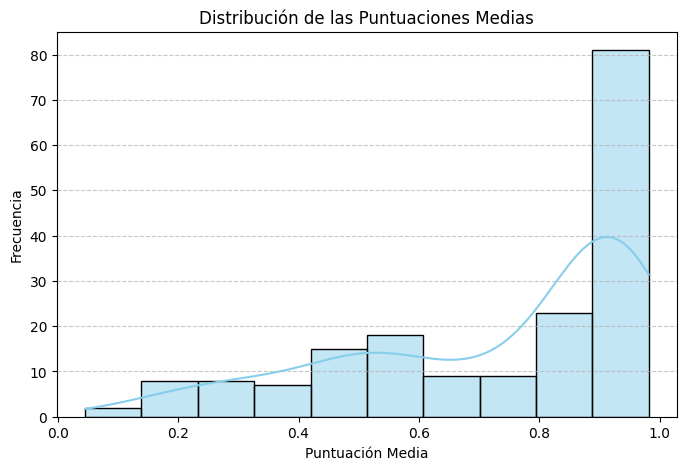

In [ ]:
# Histograma: Distribución de puntuaciones medias con Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(df["puntuacion_media"], bins=10, kde=True, color="skyblue")
plt.xlabel("Puntuación Media")
plt.ylabel("Frecuencia")
plt.title("Distribución de las Puntuaciones Medias")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

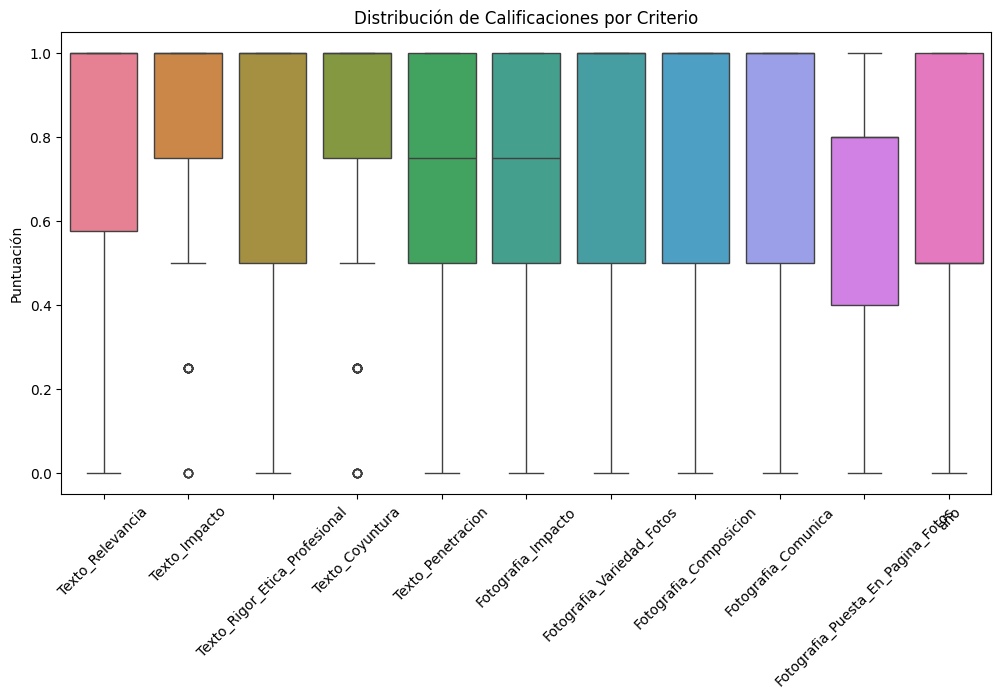

In [ ]:
# Gráfico de caja: Comparación de calificaciones por criterio con Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[criterios])
plt.xticks(rotation=45)
plt.title("Distribución de Calificaciones por Criterio")
plt.ylabel("Puntuación")
plt.show()

## Análisis con ventas

In [ ]:
# Clasificación de periódicos en 3 grupos según ventas
ventas_ordenadas = df.groupby("periodico")["ventas"].mean().sort_values()
mejores_5 = ventas_ordenadas.tail(5).index
enmedio_5 = ventas_ordenadas.iloc[len(ventas_ordenadas)//2 - 2 : len(ventas_ordenadas)//2 + 3].index
peores_5 = ventas_ordenadas.head(5).index

In [ ]:
df["grupo_ventas"] = df["periodico"].apply(lambda x: "Mejores 5" if x in mejores_5 else ("En Medio" if x in enmedio_5 else "Peores 5"))

In [ ]:
# Análisis por grupo de ventas
grupo_estadisticas = df.groupby("grupo_ventas")[criterios].mean()
print("Análisis por grupo de ventas:")
print(grupo_estadisticas)

Análisis por grupo de ventas:
              Texto_Relevancia  Texto_Impacto  Texto_Rigor_Etica_Profesional  \
grupo_ventas                                                                   
En Medio              0.818333       0.808333                       0.816667   
Mejores 5             0.791667       0.800000                       0.750000   
Peores 5              0.764167       0.770833                       0.733333   

              Texto_Coyuntura  Texto_Penetracion  Fotografia_Impacto  \
grupo_ventas                                                           
En Medio             0.833333           0.791667            0.800000   
Mejores 5            0.770833           0.750000            0.770833   
Peores 5             0.745833           0.712500            0.720833   

              Fotografia_Variedad_Fotos  Fotografia_Composicion  \
grupo_ventas                                                      
En Medio                       0.762500                0.758333   
Mejores

In [ ]:
# Ventas promedio por grupo
ventas_promedio_grupo = df.groupby("grupo_ventas")["ventas"].mean()
print("Ventas promedio por grupo:")
print(ventas_promedio_grupo)

Ventas promedio por grupo:
grupo_ventas
En Medio     197013.0
Mejores 5    241416.0
Peores 5     175497.0
Name: ventas, dtype: float64


<ipython-input-97-a0e4c9f762be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_promedio_grupo.index, y=ventas_promedio_grupo.values, palette='Blues_r') #Blues_r #Blues_r


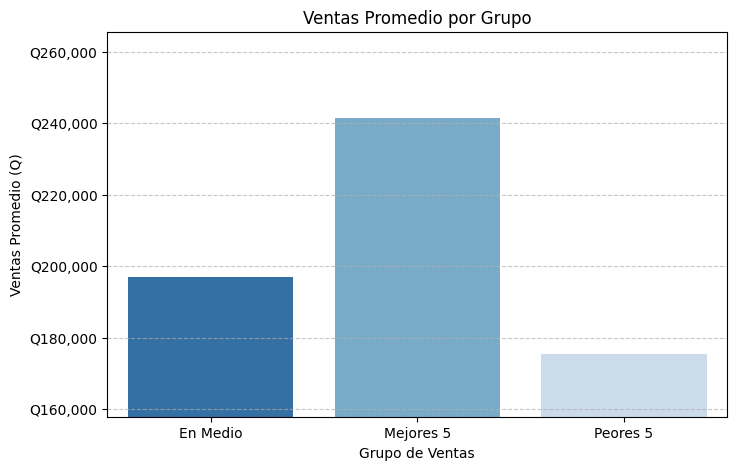

In [ ]:
# Gráfico de ventas promedio por grupo con Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=ventas_promedio_grupo.index, y=ventas_promedio_grupo.values, palette='Blues_r') #Blues_r #Blues_r
plt.xlabel("Grupo de Ventas")
plt.ylabel("Ventas Promedio (Q)")
plt.title("Ventas Promedio por Grupo")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(ventas_promedio_grupo.min() * 0.9, ventas_promedio_grupo.max() * 1.1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'Q{x:,.0f}'))
plt.show()

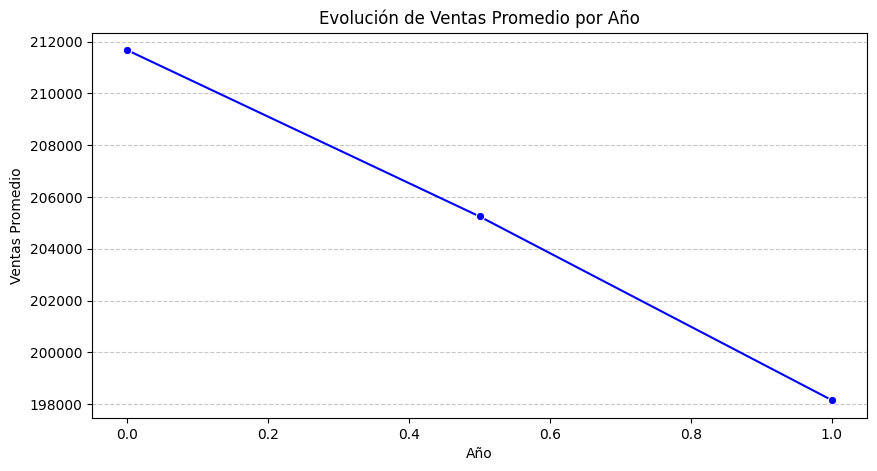

In [ ]:
# Evolución de ventas a lo largo de los años
ventas_por_año = df.groupby("año")["ventas"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=ventas_por_año.index, y=ventas_por_año.values, marker="o", color="blue")
plt.xlabel("Año")
plt.ylabel("Ventas Promedio")
plt.title("Evolución de Ventas Promedio por Año")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

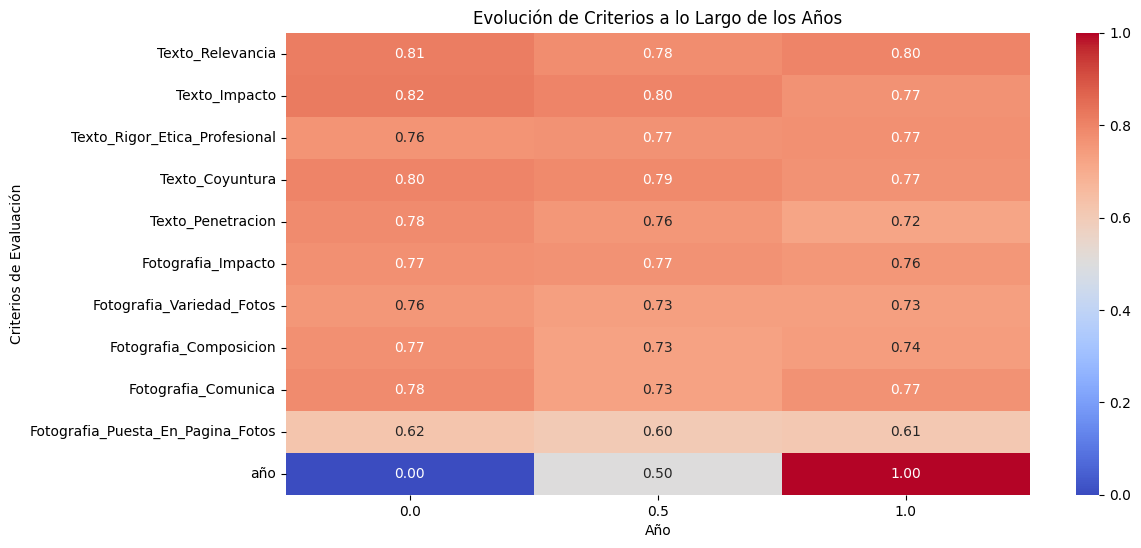

In [ ]:
# Evolución de criterios a lo largo de los años
criterios_por_año = df.groupby("año")[criterios].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(criterios_por_año.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Evolución de Criterios a lo Largo de los Años")
plt.xlabel("Año")
plt.ylabel("Criterios de Evaluación")
plt.show()

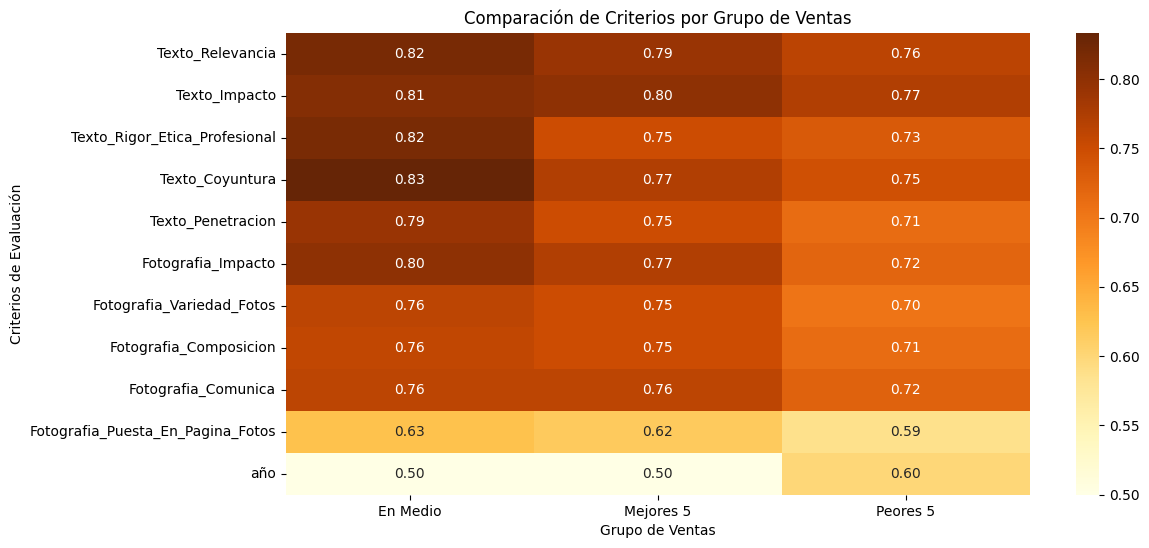

In [ ]:
# Gráfico de comparación de criterios por grupo con Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(grupo_estadisticas.T, cmap="YlOrBr", annot=True, fmt=".2f")
plt.title("Comparación de Criterios por Grupo de Ventas")
plt.xlabel("Grupo de Ventas")
plt.ylabel("Criterios de Evaluación")
plt.show()